In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [55]:
def read_data(url):
    df = pd.read_csv(url)
    df = df.loc[df[" utilization.gpu [%]"] > 0]
    #print(df.columns)
    return df

In [56]:
def time_duration(df):
    df.timestamp = [datetime.strptime(time, "%Y/%m/%d %H:%M:%S.%f") for time in df.timestamp]
    time_interval = df.iloc[-1].timestamp - df.iloc[0].timestamp
    #print("Total time in seconds: {}".format(time_interval.total_seconds()))
    return time_interval.total_seconds()

In [57]:
def power_reading(url):
    df = read_data(url)
    time_interval = time_duration(df)
    mean_power =df[' power.draw [W]'].mean()
    total_power = mean_power * time_interval
    gpu_util = df[' utilization.gpu [%]'].mean()
    memory_util = df[' utilization.memory [%]'].mean()
    memory_used = df[' memory.used [MiB]'].mean()
    data = [url.split("/")[1],mean_power,time_interval,total_power,gpu_util,memory_util,memory_used]
#     print ("Mean Power consumption (Watt): {}".format(mean_power))
#     print("Total Power consumption (Watt second): {}".format(total_power))
    return df, data

In [60]:
import os
folder_name = 'nvidia'
result = pd.DataFrame(columns=['model','mean_power','total_time','power','gpu_util','memory_util','memory_used'])
for file_name in os.listdir(folder_name):
    #print(file_name)
    url = folder_name + '/' + file_name
    df,data = power_reading(url)
   # print (data)
    result =result.append(pd.Series(data, index=result.columns),ignore_index=True)
    #print ("-------------------------------------------")

In [61]:
import time
result_file = "results/result"+ str(int(time.time()))
result.to_csv(result_file, index=False)

In [43]:
url = 'nvidia/nvidia_power_CoLA_32_128.csv'
df, x= power_reading(url)

In [44]:
df.columns

Index(['timestamp', ' utilization.gpu [%]', ' utilization.memory [%]',
       ' memory.total [MiB]', ' memory.used [MiB]', ' memory.free [MiB]',
       ' temperature.gpu', ' power.draw [W]', ' pstate'],
      dtype='object')

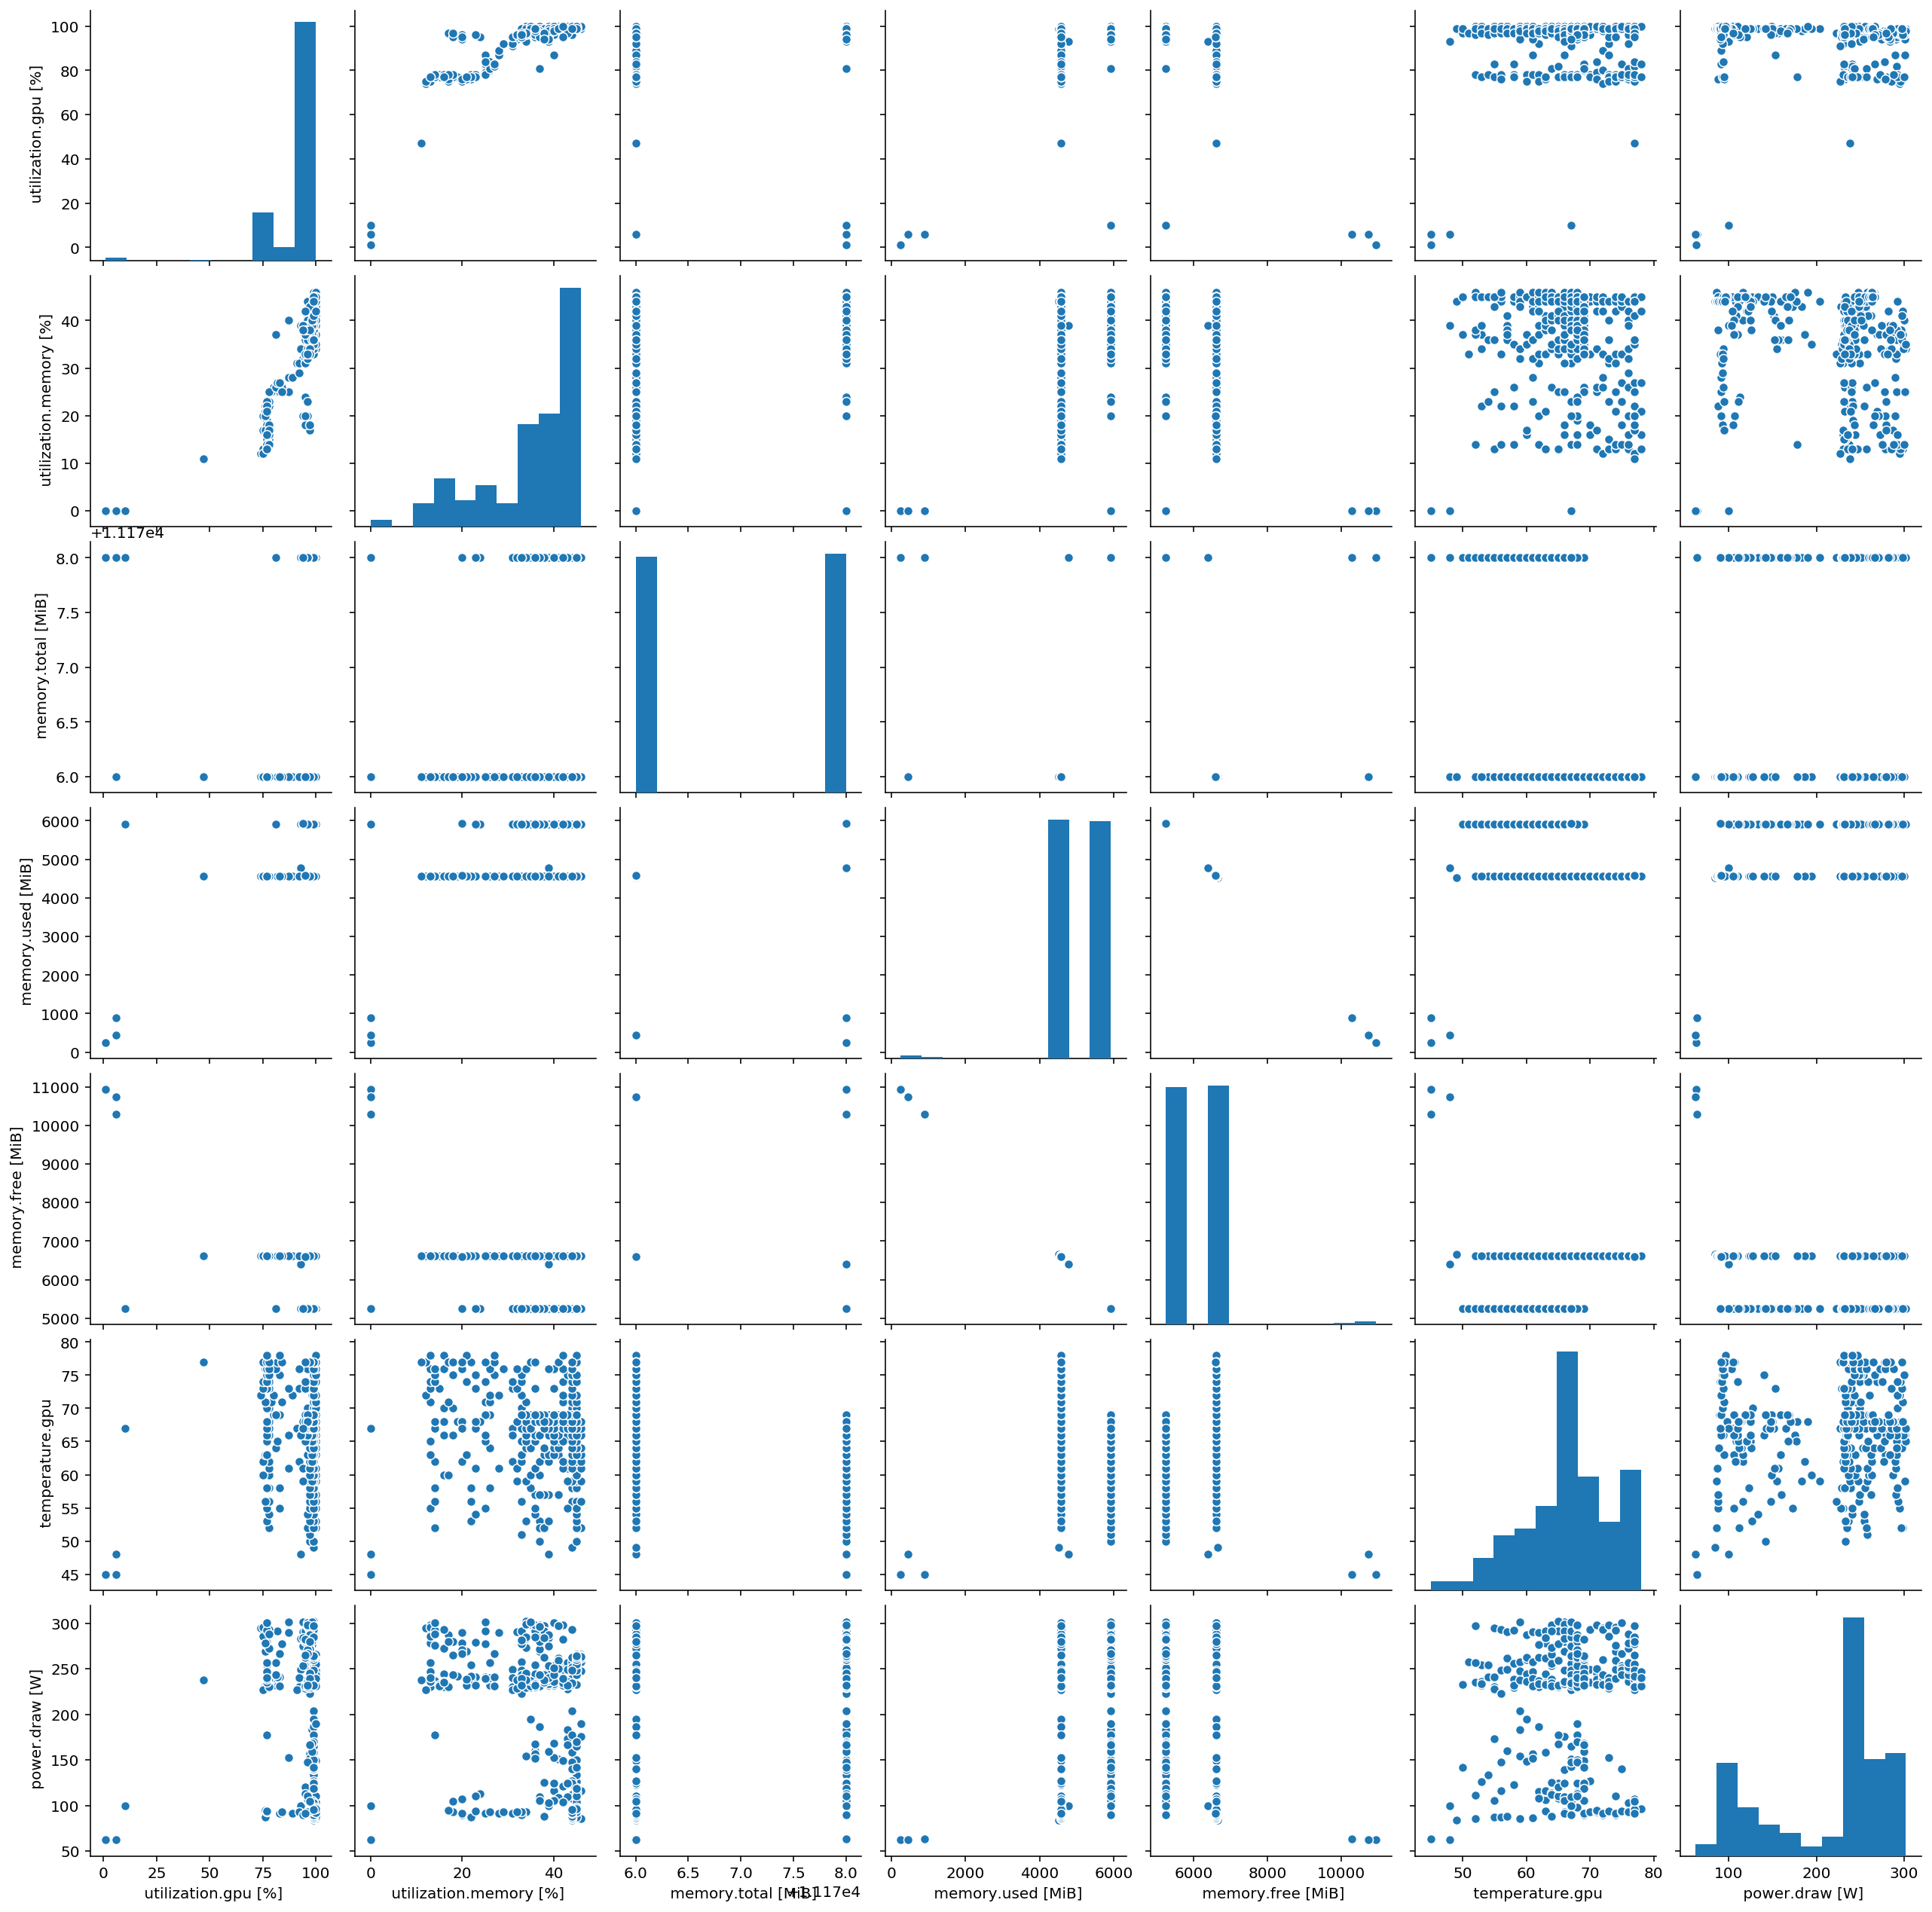

In [45]:
sns.pairplot(df)